# 선형회귀

In [2]:
import pandas as pd

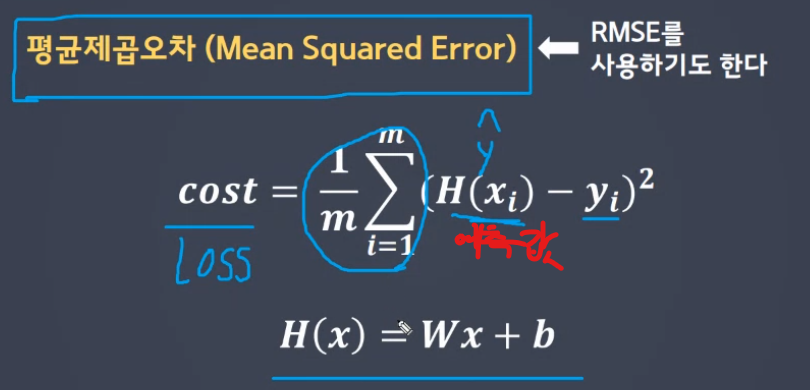

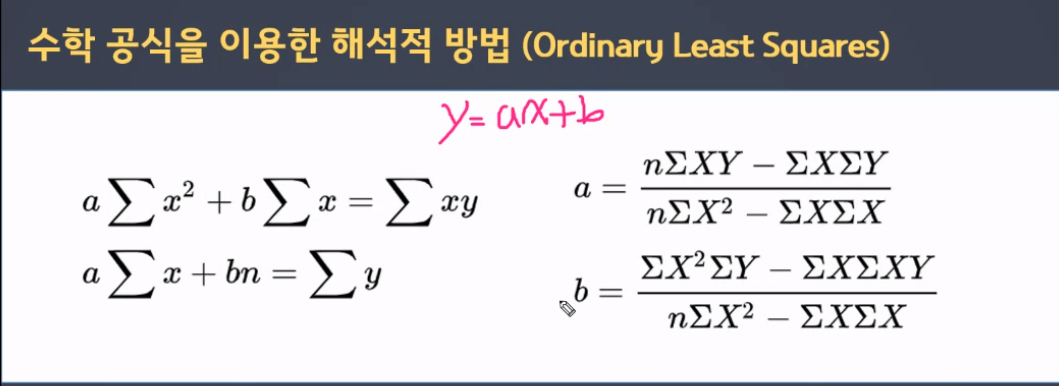

### 선형 모델의 학습 원리
1. 선형 모델은 최적의 가중치(w)와 절편(b)를 선택하기 위해 MSE(평균제곱오차)를 이용해 각 가설의 적합성을 판단한다.
2. 최적의 가중치(w)와 절편(b)를 만들기 위해서 2가지 방식을 활용한다.
    - 해석적 방법(Ordinary Least Squares) >> LinearRegression 클래스로 구현됨
    - 경사하강법(Gradient Descent Algorithm) >> SGDRegressor 클래스로 구현됨
        - 초기 가중치로부터 기울기 값을 조금씩 수정해서 찾아가는 방식
        - 기울기가 낮아지는 방향으로 계속 업데이트하는 공식

####  가중치 변화에 따른 MSE변화 그래프를 그려보자
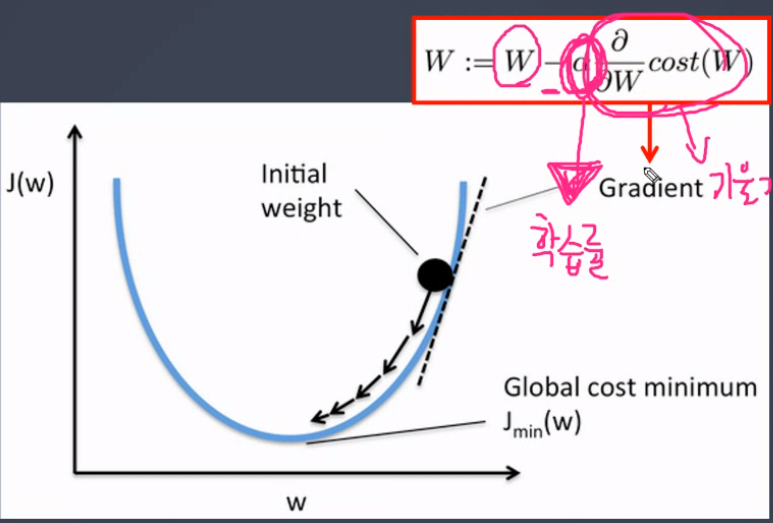
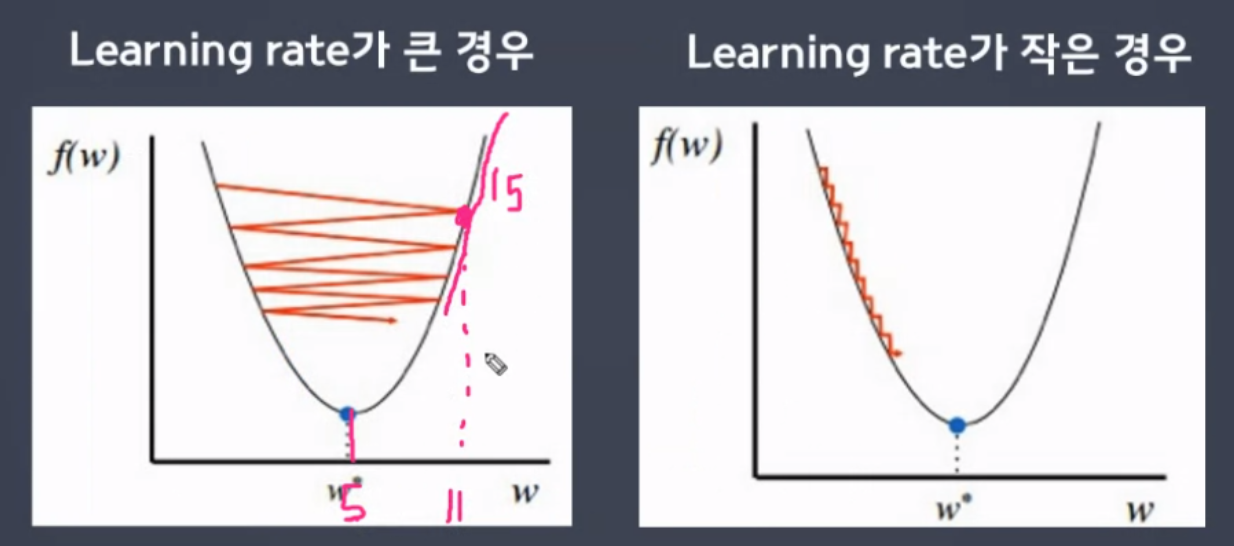
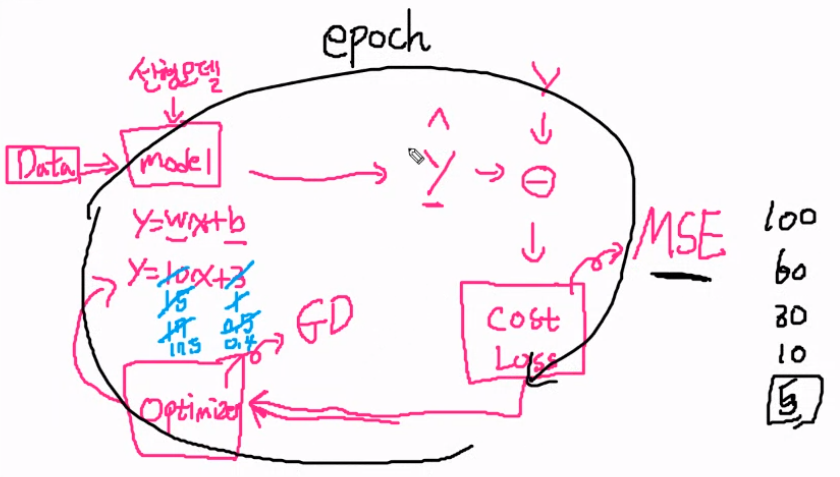
- COST/LOSS 함수 측정 by MSE(Mean Squared Error, 평균 제곱 오차)
- GD(Gradient Descent)로 가중치 w를 최적화

In [3]:
# 성적 데이터 생성
data = pd.DataFrame([[2, 20], [4, 40], [8, 80], [9, 90]], index=['해도','예호','형', '병관'], columns=['공부시간', '성적점수'])

In [5]:
print(data)

    공부시간  성적점수
해도     2    20
예호     4    40
형      8    80
병관     9    90


### MSE함수 생성

In [16]:
# 문제, 정답, 가중치를 매개변수로 받는다.
import numpy as np
def MSE(X,y,w) :
    # 에측값 생성
    y_pre = w*X + 0
    # 실제값과 예측값의 차이의 제곱 평균
    error = y - y_pre # 오차
    return (error ** 2).mean()

In [17]:
MSE(data['공부시간'], data['성적점수'], 10) # 결과값이 0이 나와야 한다.

0.0

### 그래프 그리기

In [20]:
# 변화하는 가중치(w) 생성
weights = np.linspace(0, 20)
print(weights)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [23]:
mse_list = []
for w in weights :
    mse_list.append(MSE(data['공부시간'], data['성적점수'], w))
    
print(mse_list)

[4125.0, 3795.1374427321953, 3479.019158683882, 3176.6451478550603, 2888.015410245731, 2613.1299458558933, 2351.9887546855475, 2104.5918367346935, 1870.939192003332, 1651.0308204914622, 1444.8667221990836, 1252.4468971261972, 1073.771345272803, 908.8400666389006, 757.6530612244896, 620.2103290295709, 496.5118700541441, 386.5576842982092, 290.3477717617659, 207.88213244481454, 139.1607663473552, 84.1836734693878, 42.950853810912015, 15.46230737192834, 1.718034152436478, 1.718034152436478, 15.46230737192834, 42.95085381091215, 84.1836734693878, 139.1607663473552, 207.88213244481489, 290.347771761766, 386.5576842982092, 496.5118700541442, 620.2103290295709, 757.6530612244901, 908.8400666389006, 1073.7713452728026, 1252.4468971261979, 1444.8667221990838, 1651.0308204914627, 1870.939192003332, 2104.5918367346935, 2351.988754685547, 2613.129945855895, 2888.015410245732, 3176.6451478550607, 3479.019158683883, 3795.1374427321957, 4125.0]


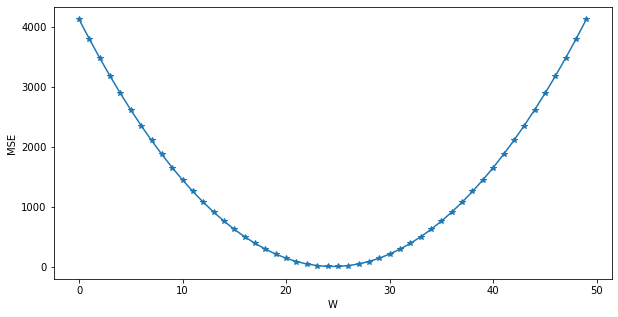

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(mse_list, marker = '*')
plt.ylabel('MSE')
plt.xlabel('W')
plt.show()

### 경사하강법으로 구현된 SGDRegressor 를 사용해보자

In [27]:
from sklearn.linear_model import SGDRegressor

In [40]:
sgd_model = SGDRegressor(
    eta0 = 0.001,  # 학습률 :
    max_iter=6000,  # 반복횟수(가중치 없데이트 없이),
    epsilon = 0.001, # 최소 오차 기준값
    n_iter_no_change=15, # 업데이트시, 오차가 변경되지 않는 걸 허용하는 횟수
    verbose=1
)

In [41]:
sgd_model.fit(data[['공부시간']],data['성적점수'])
# 대괄호([]) 2번 쓰는 이유, 특성은 현재 성적데이터와 달리 보통은 2개 이상인 경우가 많기 때문에 2차원 데이터로 나타내 주기 위해 사용

-- Epoch 1
Norm: 1.27, NNZs: 1, Bias: 0.179911, T: 4, Avg. loss: 1887.316830
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.17, NNZs: 1, Bias: 0.302854, T: 8, Avg. loss: 1462.633182
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.87, NNZs: 1, Bias: 0.399333, T: 12, Avg. loss: 1179.839218
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.45, NNZs: 1, Bias: 0.480090, T: 16, Avg. loss: 979.605481
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.95, NNZs: 1, Bias: 0.550014, T: 20, Avg. loss: 826.214691
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.40, NNZs: 1, Bias: 0.611292, T: 24, Avg. loss: 702.532432
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.79, NNZs: 1, Bias: 0.665633, T: 28, Avg. loss: 600.751582
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.14, NNZs: 1, Bias: 0.714416, T: 32, Avg. loss: 517.617218
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.46, NNZs: 1, Bias: 0.758396, T: 36, Avg. loss: 448.632594
Total training time: 0.00 

SGDRegressor(epsilon=0.001, eta0=0.001, max_iter=6000, n_iter_no_change=15,
             verbose=1)

In [32]:
print('가충치 : ',sgd_model.coef_)
print('절편 : ', sgd_model.intercept_)

가충치 :  [9.84394196]
절편 :  [1.13283624]


In [34]:
sgd_model.predict([[7],[5]])

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([70.04500182, 50.35784428])

- eta0 : 계산된 기울기 값의 0.01만큼 기울기를 변화시킴
